In [46]:
library(lme4)
library(simr)
library(dplyr)

In [56]:
file_path <- "pilot5_shuffled_nonresp_inc_ltm.csv"
df <- read.csv(file_path) %>%
    select(it_sim_dis_diff, it_sim_dis_diff_sq, reliability, v2_sim_dis_diff, v2_sim_dis_diff_sq, participant, validity, resp_correct, Accuracy, validity_binary, reliability_binary )

In [57]:
control <- lmerControl(optimizer = "bobyqa")#, optCtrl = list(maxfun = 10000))

In [58]:
model_matrix <- model.matrix(~ reliability + validity, data = df)
model_matrix


,(Intercept),reliability,validityvalid
1,1,0.6666667,1
2,1,0.6666667,1
3,1,0.8333333,0
4,1,0.6666667,1
5,1,0.6666667,0
6,1,0.8333333,1
7,1,0.6666667,0
8,1,0.6666667,0
9,1,0.8333333,1
10,1,0.6666667,1


In [50]:
formula <- resp_correct ~ (it_sim_dis_diff + it_sim_dis_diff_sq)* reliability * validity  +  (v2_sim_dis_diff + v2_sim_dis_diff_sq)* reliability * validity + (1 | participant)

In [51]:
formula1 <- glmer(formula, data = df, control = control)#family = binomial,
summary(formula1)

Warning message in glmer(formula, data = df, control = control):
“please use glmerControl() instead of lmerControl()”
Warning message in glmer(formula, data = df, control = control):
“calling glmer() with family=gaussian (identity link) as a shortcut to lmer() is deprecated; please call lmer() directly”

Correlation matrix not shown by default, as p = 20 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']
Formula: resp_correct ~ (it_sim_dis_diff + it_sim_dis_diff_sq) * reliability *  
    validity + (v2_sim_dis_diff + v2_sim_dis_diff_sq) * reliability *  
    validity + (1 | participant)
   Data: df
Control: control

REML criterion at convergence: 42877

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.44390  0.04727  0.37783  0.62090  1.75362 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.01639  0.1280  
 Residual                0.16796  0.4098  
Number of obs: 40200, groups:  participant, 134

Fixed effects:
                                              Estimate Std. Error t value
(Intercept)                                   0.844186   0.074154  11.384
it_sim_dis_diff                              -0.003722   0.051435  -0.072
it_sim_dis_diff_sq                            0.088732   0.081056   1.095
reliability                                  -0.154678   0.100963  -1.532
validityvali

In [ ]:

formula1 <- glmer(resp_correct ~ (it_sim_dis_diff + it_sim_dis_diff_sq) * reliability_binary *  
                  validity_binary + (v2_sim_dis_diff + v2_sim_dis_diff_sq) * reliability_binary *  
                  validity_binary + (1 | participant), 
                  data = df, family = binomial, control = glmerControl(optimizer = "bobyqa"))


In [ ]:
summary(formula1)

In [54]:
install.packages("car")
library(car)


The downloaded binary packages are in
	/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T//Rtmp3fvirn/downloaded_packages


In [ ]:
# formula1 <- glmer(
#   resp_correct ~ (it_sim_dis_diff + it_sim_dis_diff_sq) * reliability * validity + 
#                  (v2_sim_dis_diff + v2_sim_dis_diff_sq) * reliability * validity + 
#                  (1 | participant), 
#   data = df, 
#   family = binomial, 
#   control = glmerControl(optimizer = "bobyqa")
# )

# Anova(formula1, type = "II") 

In [ ]:
# cor_matrix <- cor(df[, c("it_sim_dis_diff", 
#                          "v2_sim_dis_diff")], use = "complete.obs")

# # Display the correlation matrix
# print(cor_matrix)

In [12]:
df$it_sim_dis_diff <- df$it_sim_dis_diff - mean(df$it_sim_dis_diff, na.rm = TRUE)
df$it_sim_dis_diff_sq <- df$it_sim_dis_diff_sq - mean(df$it_sim_dis_diff_sq, na.rm = TRUE)
df$v2_sim_dis_diff <- df$v2_sim_dis_diff - mean(df$v2_sim_dis_diff, na.rm = TRUE)
df$v2_sim_dis_diff_sq <- df$v2_sim_dis_diff_sq - mean(df$v2_sim_dis_diff_sq, na.rm = TRUE)


In [13]:
# df$reliability <- df$reliability - mean(df$reliability, na.rm = TRUE)
# df$validity <- df$validity - mean(df$validity, na.rm = TRUE)

In [14]:
# formula <- resp_correct ~ (it_sim_dis_diff + it_sim_dis_diff_sq)* reliability * validity  +  (v2_sim_dis_diff + v2_sim_dis_diff_sq)* reliability * validity + (1 | participant)

In [15]:

# formula1 <- glmer(resp_correct ~ (it_sim_dis_diff + it_sim_dis_diff_sq) * reliability *  
#                   validity + (v2_sim_dis_diff + v2_sim_dis_diff_sq) * reliability *  
#                   validity + (1 | participant), 
#                   data = df, family = binomial, control = glmerControl(optimizer = "bobyqa"))


Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00212989 (tol = 0.002, component 1)”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?”


In [16]:
# summary(formula1)


Correlation matrix not shown by default, as p = 20 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp_correct ~ (it_sim_dis_diff + it_sim_dis_diff_sq) * reliability *  
    validity + (v2_sim_dis_diff + v2_sim_dis_diff_sq) * reliability *  
    validity + (1 | participant)
   Data: df
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 41566.3  41746.9 -20762.2  41524.3    40179 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.0487  0.2170  0.4241  0.5752  1.7014 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5114   0.7151  
Number of obs: 40200, groups:  participant, 134

Fixed effects:
                                              Estimate Std. Error z value
(Intercept)                                    1.90099    0.22079   8.610
it_sim_dis_diff                               -0.07808    0.28361  -0.275
it_sim_dis_diff_sq                             0.44

In [17]:
# cor_matrix <- cor(df[, c("it_sim_dis_diff", 
#                          "v2_sim_dis_diff")], use = "complete.obs")

# # Display the correlation matrix
# print(cor_matrix)

                it_sim_dis_diff v2_sim_dis_diff
it_sim_dis_diff       1.0000000       0.1854162
v2_sim_dis_diff       0.1854162       1.0000000


In [28]:
# formula2 <- glmer(resp_correct ~ (it_sim_dis_diff * reliability * validity) +
#                   it_sim_dis_diff_sq + 
#                   (v2_sim_dis_diff * reliability * validity) + 
#                   v2_sim_dis_diff_sq + 
#                   (1 | participant), 
#                   data = df, family = binomial, control = glmerControl(optimizer = "bobyqa"))


Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge with max|grad| = 0.00218752 (tol = 0.002, component 1)”


In [32]:
# design_matrix <- model.matrix(formula2)

# # Print the design matrix
# # print(design_matrix)
# design_df <- as.data.frame(design_matrix)

# print(head(design_df))  # Display the first few rows for an overview


  (Intercept) it_sim_dis_diff reliability validityvalid it_sim_dis_diff_sq
1           1      -0.1306600   0.6666667             1        -0.53811307
2           1       0.2429907   0.6666667             1        -0.49561465
3           1      -0.7302355   0.8333333             0        -0.02278517
4           1       1.0711617   0.6666667             1         0.59389407
5           1       0.7135242   0.6666667             0        -0.04488005
6           1       0.4879909   0.8333333             1        -0.31617912
  v2_sim_dis_diff v2_sim_dis_diff_sq it_sim_dis_diff:reliability
1      0.10733675        0.002175927                 -0.08710666
2      0.03181381       -0.008626407                  0.16199380
3      0.04213106       -0.007823435                 -0.60852961
4     -0.05085566       -0.007373255                  0.71410781
5     -0.15774276        0.014508155                  0.47568277
6      0.12274317        0.005780463                  0.40665909
  it_sim_dis_diff:va

In [34]:
# design_df <- as.data.frame(model.matrix(formula2))
# design_df$participant <- df$participant  # Assuming `participant` is in `df`

# # Aggregate by participant
# summary_by_participant <- design_df %>%
#   group_by(participant) %>%
#   summarise(across(everything(), list(mean = mean, sd = sd)))

# print(summary_by_participant)

# A tibble: 134 × 29
   participant `(Intercept)_mean` `(Intercept)_sd` it_sim_dis_diff_mean
         <int>              <dbl>            <dbl>                <dbl>
 1      116851                  1                0             0.0156  
 2      121021                  1                0             0.0341  
 3      123262                  1                0             0.0352  
 4      123790                  1                0            -0.000890
 5      124321                  1                0             0.0281  
 6      124759                  1                0             0.000516
 7      127003                  1                0             0.0213  
 8      127786                  1                0            -0.0284  
 9      130366                  1                0            -0.0234  
10      130567                  1                0            -0.0477  
# ℹ 124 more rows
# ℹ 25 more variables: it_sim_dis_diff_sd <dbl>, reliability_mean <dbl>,
#   reliability_sd <dbl>

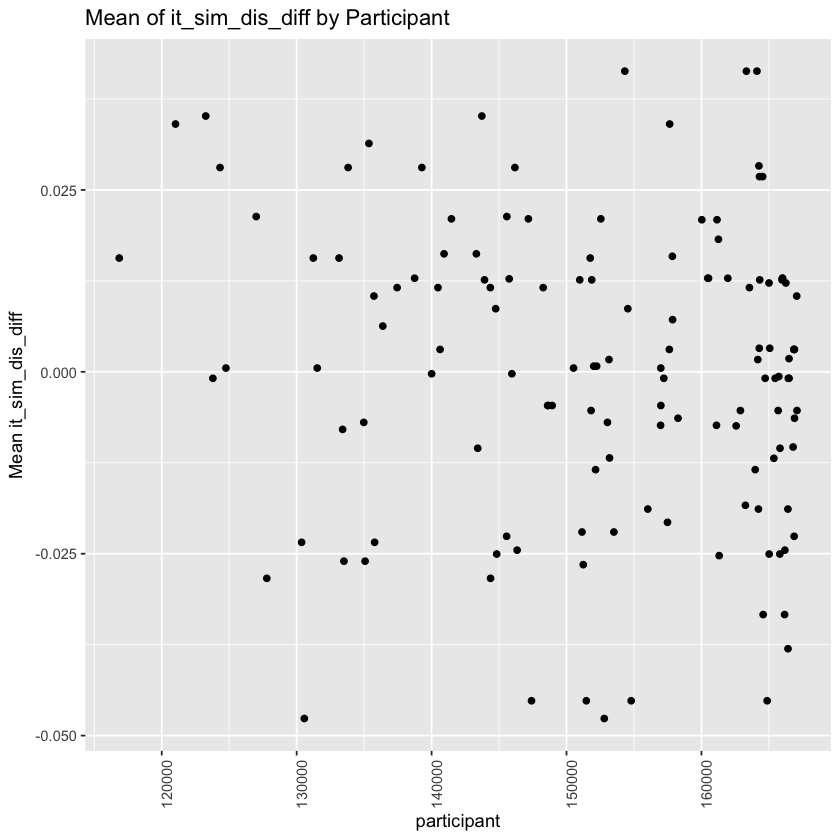

In [35]:
# library(ggplot2)

# ggplot(summary_by_participant, aes(x = participant, y = `it_sim_dis_diff_mean`)) +
#   geom_point() +
#   labs(title = "Mean of it_sim_dis_diff by Participant", y = "Mean it_sim_dis_diff") +
#   theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [37]:
# summary_stats <- design_df %>%
#   group_by(participant) %>%
#   summarise(across(everything(), list(mean = mean, sd = sd, min = min, max = max)))

# print(summary_stats)

# A tibble: 134 × 57
   participant `(Intercept)_mean` `(Intercept)_sd` `(Intercept)_min`
         <int>              <dbl>            <dbl>             <dbl>
 1      116851                  1                0                 1
 2      121021                  1                0                 1
 3      123262                  1                0                 1
 4      123790                  1                0                 1
 5      124321                  1                0                 1
 6      124759                  1                0                 1
 7      127003                  1                0                 1
 8      127786                  1                0                 1
 9      130366                  1                0                 1
10      130567                  1                0                 1
# ℹ 124 more rows
# ℹ 53 more variables: `(Intercept)_max` <dbl>, it_sim_dis_diff_mean <dbl>,
#   it_sim_dis_diff_sd <dbl>, it_sim_dis_diff_min <dbl>,


In [23]:
# # Calculate and report the range for each column
# ranges <- apply(design_matrix, 2, range)
# print(ranges)

     (Intercept) it_sim_dis_diff reliability validityvalid it_sim_dis_diff_sq
[1,]           1       -1.211579   0.6666667             0         -0.5428172
[2,]           1        1.210171   0.8333333             1          0.9112162
     v2_sim_dis_diff v2_sim_dis_diff_sq it_sim_dis_diff:reliability
[1,]      -0.1711832       -0.009716004                   -1.009649
[2,]       0.1672999        0.018876856                    1.008476
     it_sim_dis_diff:validityvalid reliability:validityvalid
[1,]                     -1.211579                 0.0000000
[2,]                      1.210171                 0.8333333
     reliability:v2_sim_dis_diff validityvalid:v2_sim_dis_diff
[1,]                  -0.1426526                    -0.1711832
[2,]                   0.1394166                     0.1672999
     it_sim_dis_diff:reliability:validityvalid
[1,]                                 -1.009649
[2,]                                  1.008476
     reliability:validityvalid:v2_sim_dis_diff
[1

In [25]:
df$v2_sim_dis_diff_z <- scale(df$v2_sim_dis_diff, center = TRUE, scale = TRUE)
df$it_sim_dis_diff_z <- scale(df$it_sim_dis_diff, center = TRUE, scale = TRUE)
df$v2_sim_dis_diff_sq_z <- scale(df$v2_sim_dis_diff, center = TRUE, scale = TRUE)
df$it_sim_dis_diff_sq_z <- scale(df$it_sim_dis_diff_sq, center = TRUE, scale = TRUE)

In [38]:
# formula2 <- glmer(resp_correct ~ (it_sim_dis_diff_z * reliability * validity) +
#                   it_sim_dis_diff_sq_z + 
#                   (v2_sim_dis_diff_z * reliability * validity) + 
#                   v2_sim_dis_diff_sq_z + 
#                   (1 | participant), 
#                   data = df, family = binomial, control = glmerControl(optimizer = "bobyqa"))
# summary(formula2)

fixed-effect model matrix is rank deficient so dropping 1 column / coefficient


Correlation matrix not shown by default, as p = 13 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp_correct ~ (it_sim_dis_diff_z * reliability * validity) +  
    it_sim_dis_diff_sq_z + (v2_sim_dis_diff_z * reliability *  
    validity) + v2_sim_dis_diff_sq_z + (1 | participant)
   Data: df
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 41577.6  41698.0 -20774.8  41549.6    40186 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8822  0.2171  0.4238  0.5756  1.5865 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5105   0.7145  
Number of obs: 40200, groups:  participant, 134

Fixed effects:
                                            Estimate Std. Error z value
(Intercept)                                  1.90725    0.21934   8.695
it_sim_dis_diff_z                           -0.03963    0.21239  -0.187
reliability                                 -1.27

In [39]:

# formula3 <- glmer(resp_correct ~ (it_sim_dis_diff_z + it_sim_dis_diff_sq_z) * reliability *  
#                   validity + (v2_sim_dis_diff_z + v2_sim_dis_diff_sq_z) * reliability *  
#                   validity + (1 | participant), 
#                   data = df, family = binomial, control = glmerControl(optimizer = "bobyqa"))


fixed-effect model matrix is rank deficient so dropping 4 columns / coefficients



In [40]:
summary(formula3)


Correlation matrix not shown by default, as p = 16 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
resp_correct ~ (it_sim_dis_diff_z + it_sim_dis_diff_sq_z) * reliability *  
    validity + (v2_sim_dis_diff_z + v2_sim_dis_diff_sq_z) * reliability *  
    validity + (1 | participant)
   Data: df
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 41578.7  41724.9 -20772.3  41544.7    40183 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8433  0.2186  0.4239  0.5757  1.6700 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5108   0.7147  
Number of obs: 40200, groups:  participant, 134

Fixed effects:
                                               Estimate Std. Error z value
(Intercept)                                     1.90134    0.22054   8.621
it_sim_dis_diff_z                              -0.04670    0.21296  -0.219
it_sim_dis_diff_sq_z                   

In [45]:
formula3 <- glmer(resp_correct ~ (it_sim_dis_diff_z) * reliability *  
                  validity  + (1 | participant), 
                  data = df, family = binomial, control = glmerControl(optimizer = "bobyqa"))


ERROR: Error in eval(predvars, data, env): object 'Accuracy' not found


In [44]:
summary(formula3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: resp_correct ~ (it_sim_dis_diff_z) * reliability * validity +  
    (1 | participant)
   Data: df
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 41592.7  41670.1 -20787.4  41574.7    40191 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8377  0.2195  0.4243  0.5748  1.5994 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5099   0.7141  
Number of obs: 40200, groups:  participant, 134

Fixed effects:
                                             Estimate Std. Error z value
(Intercept)                                  1.900507   0.220012   8.638
it_sim_dis_diff_z                           -0.137297   0.211185  -0.650
reliability                                 -1.270002   0.289532  -4.386
validityvalid                               -1.215802   0.248293  -4.897

In [42]:
summary(formula3)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
resp_correct ~ (it_sim_dis_diff_z + it_sim_dis_diff_sq_z) * reliability *  
    validity + (1 | participant)
   Data: df
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 41589.4  41701.3 -20781.7  41563.4    40187 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8467  0.2180  0.4244  0.5762  1.6617 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5105   0.7145  
Number of obs: 40200, groups:  participant, 134

Fixed effects:
                                               Estimate Std. Error z value
(Intercept)                                     1.89635    0.22156   8.559
it_sim_dis_diff_z                              -0.14303    0.20922  -0.684
it_sim_dis_diff_sq_z                            0.19404    0.21139   0.918
reliability                             

In [ ]:
### visualisation of pointf of group avarage - what we currantly have,
### but also individual averages - for each individual value